<a href="https://colab.research.google.com/github/Harini766/bharat_task1/blob/main/bharat_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
data = pd.read_csv("/content/spam.csv" ,encoding = "latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"] ,axis = 1 ,inplace = True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.rename(columns = {"v1":"Target","v2":"SMS"} ,inplace = True)
data.head()

,Target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.dropna( inplace = True )

In [11]:
stopword = set(stopwords.words('english'))
def preprocessing(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[#@\$]', '', text)
    tokens = word_tokenize(text)
    lemmatizer  = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(token) for token in tokens]
    text = [word for word in text if word not in stopword]
    return " ".join(text)

In [12]:
data["SMS_cleaned"] =  data["SMS"].apply(preprocessing)

In [13]:
data.head()

,Target,SMS,SMS_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [14]:
data["Target"].value_counts()

ham     4516
spam     653
Name: Target, dtype: int64

In [15]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [16]:
import plotly.express as px
Target_counts = data["Target"].value_counts()
fig = px.pie(Target_counts,
             names=Target_counts.index,
             values=Target_counts.values,
             title='Ham or Spam Distribution',
             color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

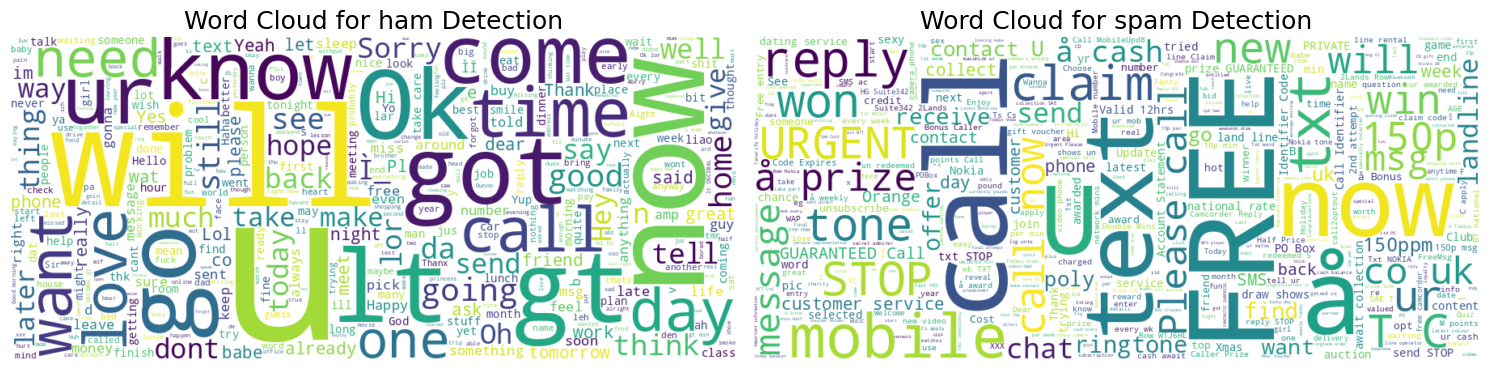

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
unique_Target = data['Target'].unique()
num_rows = len(unique_Target) // 2 + len(unique_Target) % 2
num_cols = 2
plt.figure(figsize=(15, 5 * num_rows))
for i, Target in enumerate(unique_Target, 1):
    plt.subplot(num_rows, num_cols, i)
    Target_description = " ".join(list(data[data["Target"] == Target]['SMS']))
    wordcloud = WordCloud(max_words=400, width=900, height=400, background_color='white').generate(Target_description)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {Target} Detection', fontsize=18)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Target_encoded'] = label_encoder.fit_transform(data['Target'])
class_names= list(label_encoder.classes_)
class_names

['ham', 'spam']

In [20]:
x = data["SMS_cleaned"]
y = data["Target_encoded"]

In [21]:
vectorizer = TfidfVectorizer()
x_trans= vectorizer.fit_transform(x)
x_train ,x_test ,y_train ,y_test = train_test_split(x_trans ,y ,test_size = 0.3 ,random_state = 42)
print("x train ",x_train.shape )
print("x_test" ,x_test.shape)
print("y_train" ,y_train.shape)
print("y test" ,y_test.shape)

x train  (3618, 8856)
x_test (1551, 8856)
y_train (3618,)
y test (1551,)


In [22]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
train_accuracy = mnb.score(x_train, y_train)
test_accuracy = mnb.score(x_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
y_pred = mnb.predict(x_test)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Training Accuracy: 0.96
Test Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1331
           1       1.00      0.63      0.77       220

    accuracy                           0.95      1551
   macro avg       0.97      0.81      0.87      1551
weighted avg       0.95      0.95      0.94      1551



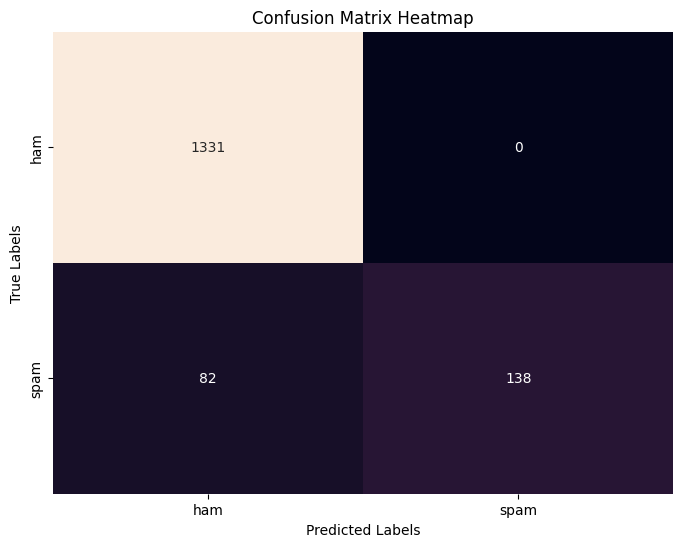

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [24]:
model = LogisticRegression()
model.fit(x_train ,y_train)
print("Model Score on Training data",model.score(x_train ,y_train))
print("Model Score on Testing data",model.score(x_test ,y_test))
y_pred = model.predict(x_test)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.9546710889994472
Model Score on Testing data 0.9329464861379755
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1421
           1       0.56      0.95      0.70       130

    accuracy                           0.93      1551
   macro avg       0.78      0.94      0.83      1551
weighted avg       0.96      0.93      0.94      1551



In [25]:
svm = LinearSVC()
svm.fit(x_train ,y_train)
print("Model Score on Training data",svm.score(x_train ,y_train))
print("Model Score on Testing data",svm.score(x_test ,y_test))
y_pred = svm.predict(x_test)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.9997236042012161
Model Score on Testing data 0.9742101869761445
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1363
           1       0.84      0.98      0.90       188

    accuracy                           0.97      1551
   macro avg       0.92      0.98      0.94      1551
weighted avg       0.98      0.97      0.98      1551

